In [86]:
import json
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neighbors import kneighbors_graph

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [87]:
# mapping = {'D605': 478, 'D602': 679, 'D249': 308, 'D520': 775, 'D603': 485, 'D352': 723, 'D353': 457, 'D031': 441, 'D057': 739, 'D033': 776, 'D032': 645, 'D035': 724, 'D034': 604, 'D036': 777, 'D039': 576, 'D038': 16, 'D243': 646, 'D813': 347, 'D812': 381, 'D428': 2, 'D429': 212, 'D817': 770, 'D816': 466, 'D815': 540, 'D814': 577, 'D130': 558, 'D423': 130, 'D420': 250, 'D421': 180, 'D426': 104, 'D427': 1, 'D424': 30, 'D425': 52, 'D136': 374, 'D502': 647, 'DV90': 779, 'D046': 725, 'D047': 500, 'D729': 117, 'D041': 26, 'D042': 147, 'D725': 244, 'D724': 97, 'D727': 408, 'D726': 336, 'D721': 203, 'D720': 396, 'D723': 297, 'D722': 202, 'D921': 526, 'DV74': 680, 'DV72': 433, 'DV71': 726, 'DV70': 208, 'D920': 409, 'D854': 648, 'D853': 422, 'D580': 379, 'D189': 255, 'D261': 257, 'D262': 410, 'D263': 85, 'D583': 114, 'D266': 246, 'D267': 781, 'D268': 298, 'D269': 461, 'D183': 479, 'D582': 248, 'D185': 261, 'D184': 727, 'D187': 681, 'D186': 782, 'D619': 438, 'D618': 447, 'D003': 783, 'D349': 132, 'D348': 56, 'D611': 363, 'D346': 164, 'D345': 69, 'D344': 152, 'D343': 354, 'D342': 182, 'D341': 446, 'D340': 211, 'D926': 728, 'D980': 501, 'D868': 392, 'D982': 784, 'D985': 729, 'D987': 682, 'D862': 560, 'D863': 442, 'D860': 316, 'D861': 358, 'D866': 620, 'D867': 295, 'D864': 411, 'D865': 417, 'DE92': 148, 'DE93': 38, 'DE90': 443, 'DE91': 179, 'DE96': 375, 'DE97': 785, 'DE94': 109, 'DE95': 256, 'DE98': 399, 'DE99': 786, 'D138': 425, 'D507': 44, 'D506': 578, 'D501': 359, 'D500': 683, 'D139': 621, 'D466': 299, 'D464': 418, 'D465': 353, 'D462': 541, 'D508': 458, 'D461': 400, 'D538': 787, 'D810': 398, 'D669': 788, 'D918': 561, 'D919': 684, 'D916': 606, 'D917': 730, 'D914': 731, 'DV62': 289, 'D913': 607, 'D910': 517, 'D911': 719, 'D484': 345, 'D485': 426, 'D486': 22, 'D487': 313, 'D480': 406, 'D481': 310, 'D482': 60, 'D483': 518, 'D488': 608, 'D422': 579, 'D143': 789, 'D131': 790, 'D132': 791, 'D761': 792, 'D760': 685, 'D763': 686, 'D133': 622, 'D765': 192, 'D764': 459, 'D767': 527, 'D766': 519, 'D769': 305, 'D768': 793, 'D135': 210, 'D008': 66, 'D009': 467, 'D164': 448, 'D163': 609, 'D162': 112, 'D161': 427, 'D160': 732, 'D137': 733, 'D004': 794, 'D005': 734, 'D007': 610, 'DV31': 371, 'DV30': 193, 'DV34': 611, 'D094': 528, 'D923': 562, 'D690': 580, 'D148': 581, 'D693': 171, 'D714': 139, 'D715': 96, 'D716': 217, 'D692': 317, 'D710': 142, 'D711': 300, 'D712': 412, 'D713': 329, 'D927': 649, 'D718': 439, 'D719': 168, 'D694': 502, 'D924': 364, 'D303': 67, 'DV87': 189, 'D301': 266, 'DV85': 144, 'D307': 272, 'D306': 612, 'D305': 37, 'D304': 149, 'D309': 187, 'D308': 582, 'DV88': 312, 'D830': 735, 'D390': 825, 'D145': 736, 'D983': 795, 'D804': 651, 'D620': 424, 'D621': 737, 'D622': 652, 'D623': 420, 'D624': 796, 'D625': 520, 'D239': 415, 'D238': 131, 'D237': 401, 'D540': 402, 'D235': 493, 'D542': 687, 'D233': 563, 'D232': 688, 'D230': 623, 'D717': 738, 'D642': 797, 'D435': 319, 'D434': 125, 'D437': 126, 'D436': 583, 'D431': 156, 'D430': 219, 'D433': 113, 'D432': 194, 'D646': 689, 'D438': 87, 'D647': 653, 'D282': 247, 'D283': 263, 'D280': 53, 'D281': 226, 'D286': 70, 'D287': 35, 'D284': 105, 'D285': 5, 'D534': 393, 'D535': 106, 'D288': 74, 'D537': 127, 'D530': 15, 'D531': 165, 'D532': 183, 'D533': 281, 'D604': 564, 'D758': 370, 'D759': 322, 'D054': 245, 'D053': 273, 'D052': 584, 'D524': 678, 'D750': 494, 'D751': 349, 'D752': 504, 'D753': 243, 'D754': 654, 'D755': 565, 'D756': 360, 'D728': 159, 'D299': 690, 'DV48': 798, 'DV49': 59, 'DV42': 68, 'DV43': 61, 'DV40': 799, 'DV46': 108, 'DV44': 57, 'DV45': 10, 'DV86': 691, 'D302': 585, 'DV84': 692, 'D049': 542, 'D300': 48, 'D273': 225, 'D272': 8, 'D271': 388, 'D270': 468, 'D277': 234, 'D276': 3, 'D275': 95, 'D274': 54, 'D848': 800, 'D279': 222, 'D278': 50, 'D378': 372, 'D379': 376, 'D372': 290, 'D373': 543, 'D370': 544, 'D371': 586, 'D376': 480, 'D377': 403, 'D374': 428, 'D375': 545, 'D096': 750, 'D170': 613, 'D831': 669, 'D846': 801, 'D171': 469, 'D847': 587, 'D974': 802, 'D975': 624, 'D976': 803, 'D977': 655, 'D970': 481, 'D971': 625, 'D972': 444, 'D973': 804, 'D082': 805, 'DE89': 693, 'DE88': 73, 'D086': 694, 'DE85': 238, 'DE84': 86, 'DE87': 18, 'DE86': 486, 'DE81': 221, 'D018': 529, 'DE83': 806, 'DE82': 434, 'D570': 137, 'D478': 172, 'D572': 65, 'D573': 195, 'D574': 119, 'D575': 196, 'D576': 123, 'D577': 93, 'D578': 51, 'D579': 205, 'D473': 301, 'D472': 695, 'D475': 614, 'D474': 656, 'D477': 449, 'D909': 307, 'D908': 505, 'D833': 807, 'D901': 588, 'D900': 566, 'D903': 567, 'D902': 568, 'D905': 394, 'D904': 589, 'D907': 271, 'D906': 548, 'D496': 28, 'D495': 696, 'D494': 218, 'D493': 39, 'D492': 150, 'D491': 71, 'D490': 530, 'D744': 740, 'D832': 808, 'DV76': 780, 'D880': 697, 'D881': 470, 'D882': 546, 'D883': 698, 'D884': 699, 'D886': 700, 'D887': 657, 'D798': 809, 'D799': 77, 'D794': 260, 'D795': 323, 'D796': 365, 'D790': 36, 'D791': 377, 'D792': 275, 'D793': 341, 'D152': 495, 'D153': 277, 'D150': 296, 'D151': 326, 'D156': 361, 'D157': 302, 'D873': 242, 'D155': 190, 'D404': 337, 'D405': 471, 'D158': 506, 'D159': 741, 'D879': 590, 'D401': 0, 'D402': 330, 'D403': 12, 'DV08': 199, 'D441': 88, 'DV06': 658, 'DV07': 384, 'DV04': 627, 'DV05': 197, 'DV02': 188, 'DV03': 591, 'DV01': 531, 'D417': 537, 'D115': 592, 'D144': 742, 'D444': 169, 'D147': 593, 'D146': 701, 'D446': 276, 'D141': 554, 'D111': 628, 'D140': 702, 'D707': 32, 'D706': 487, 'D705': 532, 'D704': 435, 'D703': 533, 'D702': 507, 'D701': 413, 'D700': 743, 'D142': 810, 'D709': 293, 'D708': 472, 'D875': 830, 'D757': 488, 'D088': 534, 'D338': 99, 'D339': 659, 'D336': 294, 'D337': 201, 'D334': 489, 'D335': 445, 'D332': 170, 'D333': 154, 'D331': 120, 'D839': 594, 'D835': 660, 'D684': 817, 'D011': 629, 'D685': 630, 'D934': 220, 'D935': 414, 'D943': 703, 'D834': 663, 'D936': 626, 'D571': 42, 'D681': 404, 'D527': 476, 'D526': 615, 'D297': 521, 'D633': 813, 'D632': 814, 'D208': 595, 'D209': 508, 'D635': 815, 'D634': 816, 'D202': 167, 'D203': 262, 'D200': 285, 'D201': 333, 'D206': 704, 'D207': 662, 'D204': 240, 'D205': 207, 'D471': 664, 'D521': 382, 'D470': 705, 'D836': 665, 'D592': 233, 'D593': 118, 'D590': 291, 'D591': 204, 'D596': 155, 'D597': 666, 'D594': 509, 'D595': 350, 'D844': 744, 'D845': 745, 'D598': 429, 'D599': 14, 'D840': 569, 'D440': 63, 'D117': 224, 'D442': 214, 'D443': 64, 'D112': 78, 'D445': 667, 'D110': 324, 'D447': 213, 'D448': 706, 'D449': 473, 'D118': 668, 'D686': 510, 'D838': 811, 'D932': 812, 'D933': 264, 'D682': 72, 'D298': 362, 'D529': 547, 'D528': 306, 'D295': 134, 'D294': 84, 'D525': 450, 'D296': 102, 'D291': 116, 'D290': 228, 'D293': 91, 'D292': 166, 'D942': 670, 'D837': 746, 'D260': 818, 'D674': 707, 'D626': 503, 'D188': 357, 'D513': 405, 'D541': 631, 'D749': 632, 'D748': 430, 'D236': 596, 'D743': 708, 'D742': 570, 'D741': 460, 'D670': 849, 'D747': 267, 'D746': 268, 'D745': 181, 'D265': 597, 'DV55': 157, 'DV54': 303, 'DV56': 549, 'DV51': 819, 'DV50': 331, 'DV53': 232, 'DV59': 820, 'DV58': 13, 'D615': 747, 'D989': 671, 'D180': 605, 'D938': 821, 'D182': 633, 'D123': 672, 'D365': 141, 'D364': 550, 'D366': 278, 'D361': 551, 'D360': 552, 'D363': 673, 'D362': 80, 'D246': 553, 'D244': 21, 'D245': 511, 'D242': 258, 'D368': 287, 'D240': 355, 'D241': 253, 'D851': 340, 'D259': 512, 'D121': 822, 'D258': 616, 'D347': 709, 'D850': 535, 'D120': 618, 'D969': 282, 'D968': 598, 'D967': 496, 'D966': 497, 'D965': 274, 'D964': 634, 'D963': 571, 'D962': 474, 'D961': 748, 'D614': 536, 'D093': 749, 'D318': 490, 'D091': 823, 'D097': 710, 'D617': 559, 'D250': 4, 'D099': 751, 'D616': 419, 'D562': 83, 'D560': 79, 'D567': 103, 'D566': 431, 'D565': 498, 'D564': 90, 'D569': 98, 'D568': 138, 'D939': 752, 'D398': 174, 'D648': 522, 'D649': 824, 'DE00': 674, 'D369': 185, 'D391': 711, 'D641': 826, 'D394': 343, 'D395': 513, 'D396': 133, 'D397': 129, 'D893': 827, 'D892': 712, 'D891': 514, 'D890': 753, 'D125': 754, 'D894': 828, 'D027': 572, 'D824': 385, 'D789': 62, 'D788': 82, 'D787': 55, 'D786': 94, 'D785': 25, 'D784': 111, 'D783': 184, 'D782': 140, 'D781': 186, 'D780': 23, 'D800': 462, 'D801': 327, 'D802': 286, 'D803': 463, 'D149': 635, 'D805': 229, 'D806': 348, 'D807': 209, 'D808': 342, 'D416': 45, 'D415': 122, 'D414': 7, 'D413': 151, 'D412': 41, 'D411': 107, 'D410': 34, 'DV18': 269, 'D825': 482, 'D223': 773, 'DV11': 338, 'DV10': 17, 'DV13': 175, 'DV12': 29, 'DV15': 31, 'DV14': 334, 'DV17': 173, 'DV16': 239, 'D869': 829, 'DV65': 475, 'D323': 383, 'D822': 717, 'DV67': 831, 'D874': 573, 'D325': 755, 'DV61': 599, 'D732': 675, 'D733': 49, 'D730': 128, 'D731': 283, 'D736': 335, 'D737': 215, 'D735': 600, 'D871': 832, 'D738': 325, 'DV63': 574, 'D870': 523, 'D154': 421, 'D872': 713, 'D013': 756, 'DV69': 714, 'D012': 833, 'DV64': 177, 'D320': 378, 'DV66': 146, 'D322': 395, 'DV60': 223, 'D324': 304, 'D327': 47, 'D326': 555, 'D010': 757, 'D878': 758, 'D821': 440, 'D058': 759, 'D215': 676, 'D214': 483, 'D217': 834, 'D216': 575, 'D211': 178, 'D210': 835, 'D198': 81, 'D199': 351, 'D196': 161, 'D197': 89, 'D194': 715, 'D195': 677, 'D192': 601, 'D193': 397, 'D191': 227, 'D945': 619, 'D358': 265, 'D359': 288, 'D608': 320, 'D944': 716, 'D354': 368, 'D355': 231, 'D356': 176, 'D357': 58, 'D350': 452, 'D351': 346, 'D600': 75, 'D601': 453, 'D644': 760, 'D941': 761, 'D948': 602, 'D996': 20, 'D997': 33, 'D994': 836, 'D995': 19, 'D992': 762, 'D588': 191, 'D990': 763, 'D991': 454, 'D585': 11, 'D584': 9, 'D587': 603, 'D586': 636, 'D581': 391, 'D852': 160, 'D998': 27, 'D999': 124, 'D826': 637, 'D536': 110, 'D453': 76, 'D452': 235, 'D451': 237, 'D289': 153, 'D457': 314, 'D456': 100, 'D455': 158, 'D454': 491, 'D127': 642, 'D459': 121, 'D458': 24, 'D589': 778, 'D823': 369, 'D691': 515, 'D922': 407, 'D518': 6, 'D519': 92, 'D695': 311, 'D820': 236, 'D696': 216, 'D512': 143, 'D698': 318, 'D510': 254, 'D511': 43, 'D516': 279, 'D517': 315, 'D514': 321, 'D515': 162, 'D543': 638, 'D463': 764, 'D776': 339, 'D777': 389, 'D774': 163, 'D775': 356, 'D772': 416, 'D773': 455, 'D770': 241, 'D771': 373, 'D627': 451, 'D778': 456, 'D779': 270, 'D174': 352, 'D175': 765, 'D176': 639, 'D079': 309, 'D078': 328, 'D172': 436, 'D173': 423, 'D075': 640, 'D077': 837, 'D070': 46, 'DV20': 641, 'DV26': 556, 'DV27': 766, 'DV29': 230, 'D023': 838, 'D664': 839, 'D665': 840, 'D666': 841, 'D683': 767, 'D811': 516, 'D629': 768, 'D912': 718, 'D557': 136, 'D680': 661, 'D227': 344, 'D213': 842, 'D220': 538, 'D212': 437, 'D221': 843, 'D310': 499, 'D311': 40, 'D312': 643, 'D313': 769, 'D314': 332, 'D315': 617, 'D316': 844, 'D317': 386, 'D251': 198, 'D319': 259, 'D253': 145, 'D252': 251, 'D255': 135, 'D254': 845, 'D257': 477, 'D256': 539, 'D040': 557, 'D218': 432, 'D523': 464, 'D958': 380, 'D959': 524, 'D952': 465, 'D953': 846, 'D950': 847, 'D951': 771, 'D956': 772, 'D957': 720, 'D954': 848, 'D955': 721, 'D522': 387, 'DE80': 850, 'D656': 851, 'D228': 366, 'D229': 852, 'D558': 252, 'D652': 853, 'D556': 200, 'D225': 284, 'D226': 722, 'D555': 206, 'D552': 280, 'D553': 115, 'D550': 292, 'D551': 650, 'D389': 249, 'D388': 484, 'DV09': 101, 'D607': 367, 'D383': 644, 'D382': 525, 'D381': 854, 'D380': 492, 'D386': 390, 'D385': 774}
# mapping = {'605': 478, '602': 679, '249': 308, '520': 775, '603': 485, '352': 723, '353': 457, '031': 441, '057': 739, '033': 776, '032': 645, '035': 724, '034': 604, '036': 777, '039': 576, '038': 16, '243': 646, '813': 347, '812': 381, '428': 2, '429': 212, '817': 770, '816': 466, '815': 540, '814': 577, '130': 558, '423': 130, '420': 250, '421': 180, '426': 104, '427': 1, '424': 30, '425': 52, '136': 374, '502': 647, 'V90': 779, '046': 725, '047': 500, '729': 117, '041': 26, '042': 147, '725': 244, '724': 97, '727': 408, '726': 336, '721': 203, '720': 396, '723': 297, '722': 202, '921': 526, 'V74': 680, 'V72': 433, 'V71': 726, 'V70': 208, '920': 409, '854': 648, '853': 422, '580': 379, '189': 255, '261': 257, '262': 410, '263': 85, '583': 114, '266': 246, '267': 781, '268': 298, '269': 461, '183': 479, '582': 248, '185': 261, '184': 727, '187': 681, '186': 782, '619': 438, '618': 447, '003': 783, '349': 132, '348': 56, '611': 363, '346': 164, '345': 69, '344': 152, '343': 354, '342': 182, '341': 446, '340': 211, '926': 728, '980': 501, '868': 392, '982': 784, '985': 729, '987': 682, '862': 560, '863': 442, '860': 316, '861': 358, '866': 620, '867': 295, '864': 411, '865': 417, 'E92': 148, 'E93': 38, 'E90': 443, 'E91': 179, 'E96': 375, 'E97': 785, 'E94': 109, 'E95': 256, 'E98': 399, 'E99': 786, '138': 425, '507': 44, '506': 578, '501': 359, '500': 683, '139': 621, '466': 299, '464': 418, '465': 353, '462': 541, '508': 458, '461': 400, '538': 787, '810': 398, '669': 788, '918': 561, '919': 684, '916': 606, '917': 730, '914': 731, 'V62': 289, '913': 607, '910': 517, '911': 719, '484': 345, '485': 426, '486': 22, '487': 313, '480': 406, '481': 310, '482': 60, '483': 518, '488': 608, '422': 579, '143': 789, '131': 790, '132': 791, '761': 792, '760': 685, '763': 686, '133': 622, '765': 192, '764': 459, '767': 527, '766': 519, '769': 305, '768': 793, '135': 210, '008': 66, '009': 467, '164': 448, '163': 609, '162': 112, '161': 427, '160': 732, '137': 733, '004': 794, '005': 734, '007': 610, 'V31': 371, 'V30': 193, 'V34': 611, '094': 528, '923': 562, '690': 580, '148': 581, '693': 171, '714': 139, '715': 96, '716': 217, '692': 317, '710': 142, '711': 300, '712': 412, '713': 329, '927': 649, '718': 439, '719': 168, '694': 502, '924': 364, '303': 67, 'V87': 189, '301': 266, 'V85': 144, '307': 272, '306': 612, '305': 37, '304': 149, '309': 187, '308': 582, 'V88': 312, '830': 735, '390': 825, '145': 736, '983': 795, '804': 651, '620': 424, '621': 737, '622': 652, '623': 420, '624': 796, '625': 520, '239': 415, '238': 131, '237': 401, '540': 402, '235': 493, '542': 687, '233': 563, '232': 688, '230': 623, '717': 738, '642': 797, '435': 319, '434': 125, '437': 126, '436': 583, '431': 156, '430': 219, '433': 113, '432': 194, '646': 689, '438': 87, '647': 653, '282': 247, '283': 263, '280': 53, '281': 226, '286': 70, '287': 35, '284': 105, '285': 5, '534': 393, '535': 106, '288': 74, '537': 127, '530': 15, '531': 165, '532': 183, '533': 281, '604': 564, '758': 370, '759': 322, '054': 245, '053': 273, '052': 584, '524': 678, '750': 494, '751': 349, '752': 504, '753': 243, '754': 654, '755': 565, '756': 360, '728': 159, '299': 690, 'V48': 798, 'V49': 59, 'V42': 68, 'V43': 61, 'V40': 799, 'V46': 108, 'V44': 57, 'V45': 10, 'V86': 691, '302': 585, 'V84': 692, '049': 542, '300': 48, '273': 225, '272': 8, '271': 388, '270': 468, '277': 234, '276': 3, '275': 95, '274': 54, '848': 800, '279': 222, '278': 50, '378': 372, '379': 376, '372': 290, '373': 543, '370': 544, '371': 586, '376': 480, '377': 403, '374': 428, '375': 545, '096': 750, '170': 613, '831': 669, '846': 801, '171': 469, '847': 587, '974': 802, '975': 624, '976': 803, '977': 655, '970': 481, '971': 625, '972': 444, '973': 804, '082': 805, 'E89': 693, 'E88': 73, '086': 694, 'E85': 238, 'E84': 86, 'E87': 18, 'E86': 486, 'E81': 221, '018': 529, 'E83': 806, 'E82': 434, '570': 137, '478': 172, '572': 65, '573': 195, '574': 119, '575': 196, '576': 123, '577': 93, '578': 51, '579': 205, '473': 301, '472': 695, '475': 614, '474': 656, '477': 449, '909': 307, '908': 505, '833': 807, '901': 588, '900': 566, '903': 567, '902': 568, '905': 394, '904': 589, '907': 271, '906': 548, '496': 28, '495': 696, '494': 218, '493': 39, '492': 150, '491': 71, '490': 530, '744': 740, '832': 808, 'V76': 780, '880': 697, '881': 470, '882': 546, '883': 698, '884': 699, '886': 700, '887': 657, '798': 809, '799': 77, '794': 260, '795': 323, '796': 365, '790': 36, '791': 377, '792': 275, '793': 341, '152': 495, '153': 277, '150': 296, '151': 326, '156': 361, '157': 302, '873': 242, '155': 190, '404': 337, '405': 471, '158': 506, '159': 741, '879': 590, '401': 0, '402': 330, '403': 12, 'V08': 199, '441': 88, 'V06': 658, 'V07': 384, 'V04': 627, 'V05': 197, 'V02': 188, 'V03': 591, 'V01': 531, '417': 537, '115': 592, '144': 742, '444': 169, '147': 593, '146': 701, '446': 276, '141': 554, '111': 628, '140': 702, '707': 32, '706': 487, '705': 532, '704': 435, '703': 533, '702': 507, '701': 413, '700': 743, '142': 810, '709': 293, '708': 472, '875': 830, '757': 488, '088': 534, '338': 99, '339': 659, '336': 294, '337': 201, '334': 489, '335': 445, '332': 170, '333': 154, '331': 120, '839': 594, '835': 660, '684': 817, '011': 629, '685': 630, '934': 220, '935': 414, '943': 703, '834': 663, '936': 626, '571': 42, '681': 404, '527': 476, '526': 615, '297': 521, '633': 813, '632': 814, '208': 595, '209': 508, '635': 815, '634': 816, '202': 167, '203': 262, '200': 285, '201': 333, '206': 704, '207': 662, '204': 240, '205': 207, '471': 664, '521': 382, '470': 705, '836': 665, '592': 233, '593': 118, '590': 291, '591': 204, '596': 155, '597': 666, '594': 509, '595': 350, '844': 744, '845': 745, '598': 429, '599': 14, '840': 569, '440': 63, '117': 224, '442': 214, '443': 64, '112': 78, '445': 667, '110': 324, '447': 213, '448': 706, '449': 473, '118': 668, '686': 510, '838': 811, '932': 812, '933': 264, '682': 72, '298': 362, '529': 547, '528': 306, '295': 134, '294': 84, '525': 450, '296': 102, '291': 116, '290': 228, '293': 91, '292': 166, '942': 670, '837': 746, '260': 818, '674': 707, '626': 503, '188': 357, '513': 405, '541': 631, '749': 632, '748': 430, '236': 596, '743': 708, '742': 570, '741': 460, '670': 849, '747': 267, '746': 268, '745': 181, '265': 597, 'V55': 157, 'V54': 303, 'V56': 549, 'V51': 819, 'V50': 331, 'V53': 232, 'V59': 820, 'V58': 13, '615': 747, '989': 671, '180': 605, '938': 821, '182': 633, '123': 672, '365': 141, '364': 550, '366': 278, '361': 551, '360': 552, '363': 673, '362': 80, '246': 553, '244': 21, '245': 511, '242': 258, '368': 287, '240': 355, '241': 253, '851': 340, '259': 512, '121': 822, '258': 616, '347': 709, '850': 535, '120': 618, '969': 282, '968': 598, '967': 496, '966': 497, '965': 274, '964': 634, '963': 571, '962': 474, '961': 748, '614': 536, '093': 749, '318': 490, '091': 823, '097': 710, '617': 559, '250': 4, '099': 751, '616': 419, '562': 83, '560': 79, '567': 103, '566': 431, '565': 498, '564': 90, '569': 98, '568': 138, '939': 752, '398': 174, '648': 522, '649': 824, 'E00': 674, '369': 185, '391': 711, '641': 826, '394': 343, '395': 513, '396': 133, '397': 129, '893': 827, '892': 712, '891': 514, '890': 753, '125': 754, '894': 828, '027': 572, '824': 385, '789': 62, '788': 82, '787': 55, '786': 94, '785': 25, '784': 111, '783': 184, '782': 140, '781': 186, '780': 23, '800': 462, '801': 327, '802': 286, '803': 463, '149': 635, '805': 229, '806': 348, '807': 209, '808': 342, '416': 45, '415': 122, '414': 7, '413': 151, '412': 41, '411': 107, '410': 34, 'V18': 269, '825': 482, '223': 773, 'V11': 338, 'V10': 17, 'V13': 175, 'V12': 29, 'V15': 31, 'V14': 334, 'V17': 173, 'V16': 239, '869': 829, 'V65': 475, '323': 383, '822': 717, 'V67': 831, '874': 573, '325': 755, 'V61': 599, '732': 675, '733': 49, '730': 128, '731': 283, '736': 335, '737': 215, '735': 600, '871': 832, '738': 325, 'V63': 574, '870': 523, '154': 421, '872': 713, '013': 756, 'V69': 714, '012': 833, 'V64': 177, '320': 378, 'V66': 146, '322': 395, 'V60': 223, '324': 304, '327': 47, '326': 555, '010': 757, '878': 758, '821': 440, '058': 759, '215': 676, '214': 483, '217': 834, '216': 575, '211': 178, '210': 835, '198': 81, '199': 351, '196': 161, '197': 89, '194': 715, '195': 677, '192': 601, '193': 397, '191': 227, '945': 619, '358': 265, '359': 288, '608': 320, '944': 716, '354': 368, '355': 231, '356': 176, '357': 58, '350': 452, '351': 346, '600': 75, '601': 453, '644': 760, '941': 761, '948': 602, '996': 20, '997': 33, '994': 836, '995': 19, '992': 762, '588': 191, '990': 763, '991': 454, '585': 11, '584': 9, '587': 603, '586': 636, '581': 391, '852': 160, '998': 27, '999': 124, '826': 637, '536': 110, '453': 76, '452': 235, '451': 237, '289': 153, '457': 314, '456': 100, '455': 158, '454': 491, '127': 642, '459': 121, '458': 24, '589': 778, '823': 369, '691': 515, '922': 407, '518': 6, '519': 92, '695': 311, '820': 236, '696': 216, '512': 143, '698': 318, '510': 254, '511': 43, '516': 279, '517': 315, '514': 321, '515': 162, '543': 638, '463': 764, '776': 339, '777': 389, '774': 163, '775': 356, '772': 416, '773': 455, '770': 241, '771': 373, '627': 451, '778': 456, '779': 270, '174': 352, '175': 765, '176': 639, '079': 309, '078': 328, '172': 436, '173': 423, '075': 640, '077': 837, '070': 46, 'V20': 641, 'V26': 556, 'V27': 766, 'V29': 230, '023': 838, '664': 839, '665': 840, '666': 841, '683': 767, '811': 516, '629': 768, '912': 718, '557': 136, '680': 661, '227': 344, '213': 842, '220': 538, '212': 437, '221': 843, '310': 499, '311': 40, '312': 643, '313': 769, '314': 332, '315': 617, '316': 844, '317': 386, '251': 198, '319': 259, '253': 145, '252': 251, '255': 135, '254': 845, '257': 477, '256': 539, '040': 557, '218': 432, '523': 464, '958': 380, '959': 524, '952': 465, '953': 846, '950': 847, '951': 771, '956': 772, '957': 720, '954': 848, '955': 721, '522': 387, 'E80': 850, '656': 851, '228': 366, '229': 852, '558': 252, '652': 853, '556': 200, '225': 284, '226': 722, '555': 206, '552': 280, '553': 115, '550': 292, '551': 650, '389': 249, '388': 484, 'V09': 101, '607': 367, '383': 644, '382': 525, '381': 854, '380': 492, '386': 390, '385': 774}
mapping = {'605': 478, '602': 679, '249': 308, '520': 775, '603': 485, '352': 723, '353': 457, '031': 441, '057': 739, '033': 776, '032': 645, '035': 724, '034': 604, '036': 777, '039': 576, '038': 16, '243': 646, '813': 347, '812': 381, '428': 2, '429': 212, '817': 770, '816': 466, '815': 540, '814': 577, '130': 558, '423': 130, '420': 250, '421': 180, '426': 104, '427': 1, '424': 30, '425': 52, '136': 374, '502': 647, 'V90': 779, '046': 725, '047': 500, '729': 117, '041': 26, '042': 147, '725': 244, '724': 97, '727': 408, '726': 336, '721': 203, '720': 396, '723': 297, '722': 202, '921': 526, 'V74': 680, 'V72': 433, 'V71': 726, 'V70': 208, '920': 409, '854': 648, '853': 422, '580': 379, '189': 255, '261': 257, '262': 410, '263': 85, '583': 114, '266': 246, '267': 781, '268': 298, '269': 461, '183': 479, '582': 248, '185': 261, '184': 727, '187': 681, '186': 782, '619': 438, '618': 447, '003': 783, '349': 132, '348': 56, '611': 363, '346': 164, '345': 69, '344': 152, '343': 354, '342': 182, '341': 446, '340': 211, '926': 728, '980': 501, '868': 392, '982': 784, '985': 729, '987': 682, '862': 560, '863': 442, '860': 316, '861': 358, '866': 620, '867': 295, '864': 411, '865': 417, 'E920': 148, 'E930': 38, 'E900': 443, 'E910': 179, 'E960': 375, 'E970': 785, 'E940': 109, 'E950': 256, 'E980': 399, 'E990': 786, '138': 425, '507': 44, '506': 578, '501': 359, '500': 683, '139': 621, '466': 299, '464': 418, '465': 353, '462': 541, '508': 458, '461': 400, '538': 787, '810': 398, '669': 788, '918': 561, '919': 684, '916': 606, '917': 730, '914': 731, 'V62': 289, '913': 607, '910': 517, '911': 719, '484': 345, '485': 426, '486': 22, '487': 313, '480': 406, '481': 310, '482': 60, '483': 518, '488': 608, '422': 579, '143': 789, '131': 790, '132': 791, '761': 792, '760': 685, '763': 686, '133': 622, '765': 192, '764': 459, '767': 527, '766': 519, '769': 305, '768': 793, '135': 210, '008': 66, '009': 467, '164': 448, '163': 609, '162': 112, '161': 427, '160': 732, '137': 733, '004': 794, '005': 734, '007': 610, 'V31': 371, 'V30': 193, 'V34': 611, '094': 528, '923': 562, '690': 580, '148': 581, '693': 171, '714': 139, '715': 96, '716': 217, '692': 317, '710': 142, '711': 300, '712': 412, '713': 329, '927': 649, '718': 439, '719': 168, '694': 502, '924': 364, '303': 67, 'V87': 189, '301': 266, 'V85': 144, '307': 272, '306': 612, '305': 37, '304': 149, '309': 187, '308': 582, 'V88': 312, '830': 735, '390': 825, '145': 736, '983': 795, '804': 651, '620': 424, '621': 737, '622': 652, '623': 420, '624': 796, '625': 520, '239': 415, '238': 131, '237': 401, '540': 402, '235': 493, '542': 687, '233': 563, '232': 688, '230': 623, '717': 738, '642': 797, '435': 319, '434': 125, '437': 126, '436': 583, '431': 156, '430': 219, '433': 113, '432': 194, '646': 689, '438': 87, '647': 653, '282': 247, '283': 263, '280': 53, '281': 226, '286': 70, '287': 35, '284': 105, '285': 5, '534': 393, '535': 106, '288': 74, '537': 127, '530': 15, '531': 165, '532': 183, '533': 281, '604': 564, '758': 370, '759': 322, '054': 245, '053': 273, '052': 584, '524': 678, '750': 494, '751': 349, '752': 504, '753': 243, '754': 654, '755': 565, '756': 360, '728': 159, '299': 690, 'V48': 798, 'V49': 59, 'V42': 68, 'V43': 61, 'V40': 799, 'V46': 108, 'V44': 57, 'V45': 10, 'V86': 691, '302': 585, 'V84': 692, '049': 542, '300': 48, '273': 225, '272': 8, '271': 388, '270': 468, '277': 234, '276': 3, '275': 95, '274': 54, '848': 800, '279': 222, '278': 50, '378': 372, '379': 376, '372': 290, '373': 543, '370': 544, '371': 586, '376': 480, '377': 403, '374': 428, '375': 545, '096': 750, '170': 613, '831': 669, '846': 801, '171': 469, '847': 587, '974': 802, '975': 624, '976': 803, '977': 655, '970': 481, '971': 625, '972': 444, '973': 804, '082': 805, 'E890': 693, 'E880': 73, '086': 694, 'E850': 238, 'E840': 86, 'E870': 18, 'E860': 486, 'E810': 221, '018': 529, 'E830': 806, 'E820': 434, '570': 137, '478': 172, '572': 65, '573': 195, '574': 119, '575': 196, '576': 123, '577': 93, '578': 51, '579': 205, '473': 301, '472': 695, '475': 614, '474': 656, '477': 449, '909': 307, '908': 505, '833': 807, '901': 588, '900': 566, '903': 567, '902': 568, '905': 394, '904': 589, '907': 271, '906': 548, '496': 28, '495': 696, '494': 218, '493': 39, '492': 150, '491': 71, '490': 530, '744': 740, '832': 808, 'V76': 780, '880': 697, '881': 470, '882': 546, '883': 698, '884': 699, '886': 700, '887': 657, '798': 809, '799': 77, '794': 260, '795': 323, '796': 365, '790': 36, '791': 377, '792': 275, '793': 341, '152': 495, '153': 277, '150': 296, '151': 326, '156': 361, '157': 302, '873': 242, '155': 190, '404': 337, '405': 471, '158': 506, '159': 741, '879': 590, '401': 0, '402': 330, '403': 12, 'V08': 199, '441': 88, 'V06': 658, 'V07': 384, 'V04': 627, 'V05': 197, 'V02': 188, 'V03': 591, 'V01': 531, '417': 537, '115': 592, '144': 742, '444': 169, '147': 593, '146': 701, '446': 276, '141': 554, '111': 628, '140': 702, '707': 32, '706': 487, '705': 532, '704': 435, '703': 533, '702': 507, '701': 413, '700': 743, '142': 810, '709': 293, '708': 472, '875': 830, '757': 488, '088': 534, '338': 99, '339': 659, '336': 294, '337': 201, '334': 489, '335': 445, '332': 170, '333': 154, '331': 120, '839': 594, '835': 660, '684': 817, '011': 629, '685': 630, '934': 220, '935': 414, '943': 703, '834': 663, '936': 626, '571': 42, '681': 404, '527': 476, '526': 615, '297': 521, '633': 813, '632': 814, '208': 595, '209': 508, '635': 815, '634': 816, '202': 167, '203': 262, '200': 285, '201': 333, '206': 704, '207': 662, '204': 240, '205': 207, '471': 664, '521': 382, '470': 705, '836': 665, '592': 233, '593': 118, '590': 291, '591': 204, '596': 155, '597': 666, '594': 509, '595': 350, '844': 744, '845': 745, '598': 429, '599': 14, '840': 569, '440': 63, '117': 224, '442': 214, '443': 64, '112': 78, '445': 667, '110': 324, '447': 213, '448': 706, '449': 473, '118': 668, '686': 510, '838': 811, '932': 812, '933': 264, '682': 72, '298': 362, '529': 547, '528': 306, '295': 134, '294': 84, '525': 450, '296': 102, '291': 116, '290': 228, '293': 91, '292': 166, '942': 670, '837': 746, '260': 818, '674': 707, '626': 503, '188': 357, '513': 405, '541': 631, '749': 632, '748': 430, '236': 596, '743': 708, '742': 570, '741': 460, '670': 849, '747': 267, '746': 268, '745': 181, '265': 597, 'V55': 157, 'V54': 303, 'V56': 549, 'V51': 819, 'V50': 331, 'V53': 232, 'V59': 820, 'V58': 13, '615': 747, '989': 671, '180': 605, '938': 821, '182': 633, '123': 672, '365': 141, '364': 550, '366': 278, '361': 551, '360': 552, '363': 673, '362': 80, '246': 553, '244': 21, '245': 511, '242': 258, '368': 287, '240': 355, '241': 253, '851': 340, '259': 512, '121': 822, '258': 616, '347': 709, '850': 535, '120': 618, '969': 282, '968': 598, '967': 496, '966': 497, '965': 274, '964': 634, '963': 571, '962': 474, '961': 748, '614': 536, '093': 749, '318': 490, '091': 823, '097': 710, '617': 559, '250': 4, '099': 751, '616': 419, '562': 83, '560': 79, '567': 103, '566': 431, '565': 498, '564': 90, '569': 98, '568': 138, '939': 752, '398': 174, '648': 522, '649': 824, 'E000': 674, '369': 185, '391': 711, '641': 826, '394': 343, '395': 513, '396': 133, '397': 129, '893': 827, '892': 712, '891': 514, '890': 753, '125': 754, '894': 828, '027': 572, '824': 385, '789': 62, '788': 82, '787': 55, '786': 94, '785': 25, '784': 111, '783': 184, '782': 140, '781': 186, '780': 23, '800': 462, '801': 327, '802': 286, '803': 463, '149': 635, '805': 229, '806': 348, '807': 209, '808': 342, '416': 45, '415': 122, '414': 7, '413': 151, '412': 41, '411': 107, '410': 34, 'V18': 269, '825': 482, '223': 773, 'V11': 338, 'V10': 17, 'V13': 175, 'V12': 29, 'V15': 31, 'V14': 334, 'V17': 173, 'V16': 239, '869': 829, 'V65': 475, '323': 383, '822': 717, 'V67': 831, '874': 573, '325': 755, 'V61': 599, '732': 675, '733': 49, '730': 128, '731': 283, '736': 335, '737': 215, '735': 600, '871': 832, '738': 325, 'V63': 574, '870': 523, '154': 421, '872': 713, '013': 756, 'V69': 714, '012': 833, 'V64': 177, '320': 378, 'V66': 146, '322': 395, 'V60': 223, '324': 304, '327': 47, '326': 555, '010': 757, '878': 758, '821': 440, '058': 759, '215': 676, '214': 483, '217': 834, '216': 575, '211': 178, '210': 835, '198': 81, '199': 351, '196': 161, '197': 89, '194': 715, '195': 677, '192': 601, '193': 397, '191': 227, '945': 619, '358': 265, '359': 288, '608': 320, '944': 716, '354': 368, '355': 231, '356': 176, '357': 58, '350': 452, '351': 346, '600': 75, '601': 453, '644': 760, '941': 761, '948': 602, '996': 20, '997': 33, '994': 836, '995': 19, '992': 762, '588': 191, '990': 763, '991': 454, '585': 11, '584': 9, '587': 603, '586': 636, '581': 391, '852': 160, '998': 27, '999': 124, '826': 637, '536': 110, '453': 76, '452': 235, '451': 237, '289': 153, '457': 314, '456': 100, '455': 158, '454': 491, '127': 642, '459': 121, '458': 24, '589': 778, '823': 369, '691': 515, '922': 407, '518': 6, '519': 92, '695': 311, '820': 236, '696': 216, '512': 143, '698': 318, '510': 254, '511': 43, '516': 279, '517': 315, '514': 321, '515': 162, '543': 638, '463': 764, '776': 339, '777': 389, '774': 163, '775': 356, '772': 416, '773': 455, '770': 241, '771': 373, '627': 451, '778': 456, '779': 270, '174': 352, '175': 765, '176': 639, '079': 309, '078': 328, '172': 436, '173': 423, '075': 640, '077': 837, '070': 46, 'V20': 641, 'V26': 556, 'V27': 766, 'V29': 230, '023': 838, '664': 839, '665': 840, '666': 841, '683': 767, '811': 516, '629': 768, '912': 718, '557': 136, '680': 661, '227': 344, '213': 842, '220': 538, '212': 437, '221': 843, '310': 499, '311': 40, '312': 643, '313': 769, '314': 332, '315': 617, '316': 844, '317': 386, '251': 198, '319': 259, '253': 145, '252': 251, '255': 135, '254': 845, '257': 477, '256': 539, '040': 557, '218': 432, '523': 464, '958': 380, '959': 524, '952': 465, '953': 846, '950': 847, '951': 771, '956': 772, '957': 720, '954': 848, '955': 721, '522': 387, 'E800': 850, '656': 851, '228': 366, '229': 852, '558': 252, '652': 853, '556': 200, '225': 284, '226': 722, '555': 206, '552': 280, '553': 115, '550': 292, '551': 650, '389': 249, '388': 484, 'V09': 101, '607': 367, '383': 644, '382': 525, '381': 854, '380': 492, '386': 390, '385': 774}

In [88]:
# mapping_names = {"261": "Nutritional marasmus",
#                  "729": "Other disorders of soft tissues",
#                  "117": "Other mycoses",
#                  "747": "Other congenital anomalies of circulatory system",
#                  "731": "Osteitis deformans and osteopathies associated with other disorders classified elsewhere",
#                  "E93": "Antibiotics causing adverse effects in therapeutic use",
#                  "V42": "Organ or tissue replaced by transplant",
#                  "250": "Diabetes mellitus",
#                  "729": "Other disorders of soft tissues",
#                  "427": "Cardiac dysrhythmias",
#                  "285": "Other and unspecified anemias",
#                  "276": "Disorders of fluid electrolyte and acid-base balance",
#                  "428": "Heart failure",
#                  "403": "Hypertensive chronic kidney disease",
#                  "V58": "Encounter for other and unspecified procedures and aftercare",
#                  "585": "Chronic kidney disease (ckd)",
#                  "300": "Anxiety, dissociative and somatoform disorders",
#                  "578": "Gastrointestinal hemorrhage",
#                  "577": "Diseases of pancreas"}

mapping_names = open('illness.json')
mapping_names = json.load(mapping_names)

In [89]:
# mapping_names

In [90]:
# list(mapping.keys())[list(mapping.values()).index(0)].replace("D", "")

### 855

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7482 samples in 0.767s...
[t-SNE] Computed neighbors for 7482 samples in 101.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7482
[t-SNE] Computed conditional probabilities for sample 2000 / 7482
[t-SNE] Computed conditional probabilities for sample 3000 / 7482
[t-SNE] Computed conditional probabilities for sample 4000 / 7482
[t-SNE] Computed conditional probabilities for sample 5000 / 7482
[t-SNE] Computed conditional probabilities for sample 6000 / 7482
[t-SNE] Computed conditional probabilities for sample 7000 / 7482
[t-SNE] Computed conditional probabilities for sample 7482 / 7482
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.903908
[t-SNE] KL divergence after 5000 iterations: 1.816837


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 5 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7482 samples in 0.541s...
[t-SNE] Computed neighbors for 7482 samples in 78.587s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7482
[t-SNE] Computed conditional probabilities for sample 2000 / 7482
[t-SNE] Computed conditional probabilities for sample 3000 / 7482
[t-SNE] Computed conditional probabilities for sample 4000 / 7482
[t-SNE] Computed conditional probabilities for sample 5000 / 7482
[t-SNE] Computed conditional probabilities for sample 6000 / 7482
[t-SNE] Computed conditional probabilities for sample 7000 / 7482
[t-SNE] Computed conditional probabilities for sample 7482 / 7482
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.903908
[t-SNE] KL divergence after 5000 iterations: 1.816837


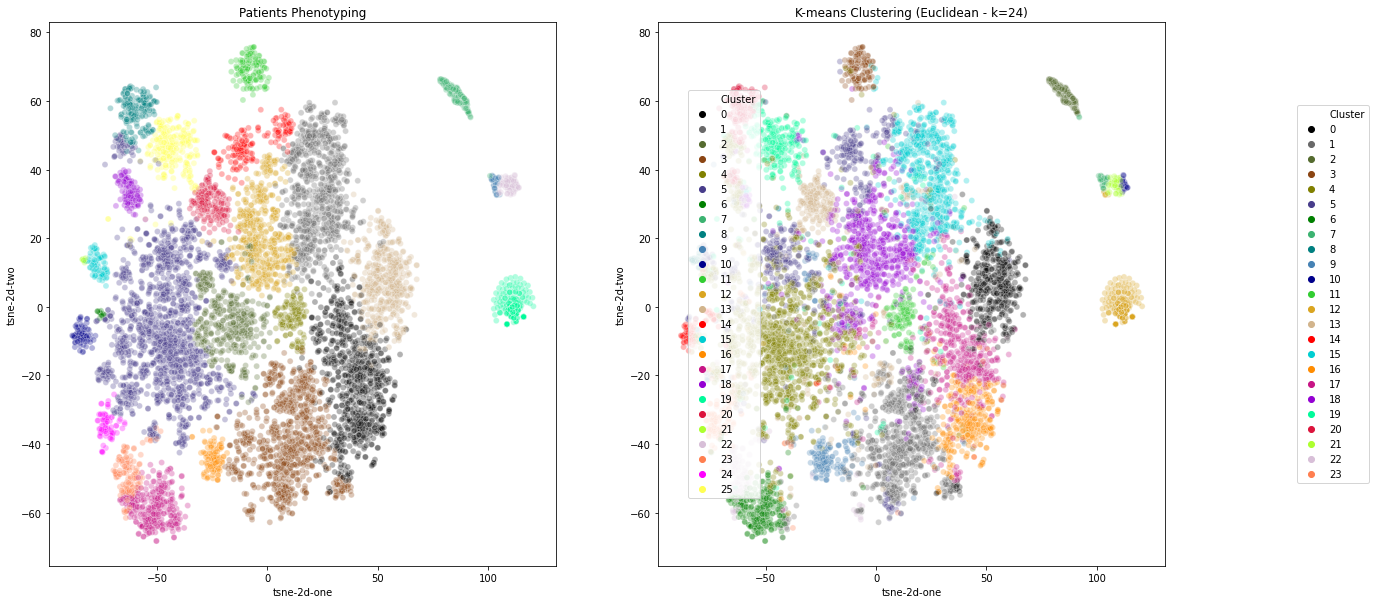

In [91]:
plt.figure(figsize=(20,10))

############################# K-means k=24

X = pd.read_csv('theano-to-tf/855-attentionhcare-542-codes_prediction.csv', header=None)
X, subjects = X.iloc[:,1:], X.iloc[:,:1]
# colors = ["#000000", "#696969", "#556b2f", "#8b4513", "#808000", "#483d8b", "#008000", "#3cb371", "#008080", "#4682b4", "#00008b", "#32cd32", "#daa520", "#d2b48c", "#ff0000", "#00ced1", "#ff8c00", "#c71585", "#9400d3", "#00fa9a", "#dc143c", "#adff2f", "#d8bfd8", "#ff7f50", "#ff00ff", "#1e90ff", "#f0e68c", "#ffff54", "#7b68ee", "#ee82ee"]
colors = ["#000000", "#696969", "#556b2f", "#8b4513", "#808000", "#483d8b", "#008000", "#3cb371", "#008080", "#4682b4", "#00008b", "#32cd32", "#daa520", "#d2b48c", "#ff0000", "#00ced1", "#ff8c00", "#c71585", "#9400d3", "#00fa9a", "#dc143c", "#adff2f", "#d8bfd8", "#ff7f50"]

labels = KMeans(n_clusters=24, random_state=0).fit_predict(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000, random_state=0)
tsne_results = tsne.fit_transform(X)

df = pd.DataFrame({'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1]})
df['Cluster'] = labels.T

ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text('K-means Clustering (Euclidean - k=24)')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

############################## Linkage k=26 knn=20

X = pd.read_csv('theano-to-tf/855-attentionhcare-542-codes_prediction.csv', header=None)
X = X.iloc[:,1:]
colors = ["#000000", "#696969", "#556b2f", "#8b4513", "#808000", "#483d8b", "#008000", "#3cb371", "#008080", "#4682b4", "#00008b", "#32cd32", "#daa520", "#d2b48c", "#ff0000", "#00ced1", "#ff8c00", "#c71585", "#9400d3", "#00fa9a", "#dc143c", "#adff2f", "#d8bfd8", "#ff7f50", "#ff00ff", "#ffff54"]
# colors = ["#000000", "#8b4513", "#808000", "#483d8b", "#008080", "#4682b4", "#00008b", "#800080", "#d2b48c", "#ff0000", "#00ced1", "#ff8c00", "#c71585", "#00ff00", "#dc143c", "#0000ff", "#adff2f", "#d8bfd8", "#ff7f50", "#ff00ff", "#1e90ff", "#ffff54", "#7b68ee", "#ee82ee", "#87cefa"]

knn_graph = kneighbors_graph(df, 20, include_self=False)
labels = AgglomerativeClustering(n_clusters=26, connectivity=knn_graph).fit_predict(X)

#perplexity = 30 melhor até agora
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000, random_state=0)
tsne_results = tsne.fit_transform(X)

df = pd.DataFrame({'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1]})
df['Cluster'] = labels.T

ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('Patients Phenotyping')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [92]:
df

,tsne-2d-one,tsne-2d-two,Cluster
0,-55.456612,49.871727,8
1,11.581072,-27.271166,3
2,-27.900938,33.310661,20
3,7.255250,-55.800011,3
4,9.233554,-36.327999,3
...,...,...,...
7477,105.351936,-1.730730,19
7478,102.584312,-0.569328,19
7479,104.268257,-0.294362,19
7480,111.841919,2.104657,19


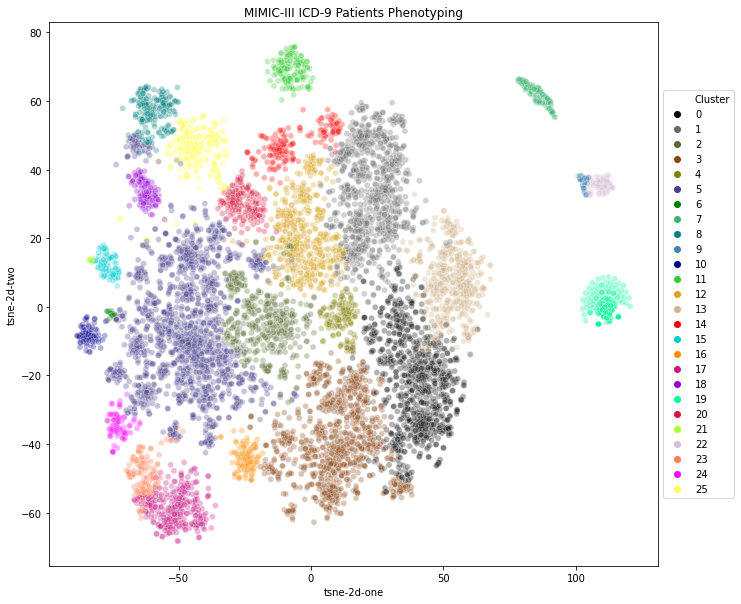

In [93]:
plt.figure(figsize=(24,10))

ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('MIMIC-III ICD-9 Patients Phenotyping')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

In [94]:
# ############################## Linkage k=26 knn=20

# df = pd.read_csv('theano-to-tf/855-attentionhcare-542-codes_prediction.csv', header=None)
# df = df.iloc[:,1:]

# X = df.copy()

# knn_graph = kneighbors_graph(df, 20, include_self=False)
# labels = AgglomerativeClustering(n_clusters=26, connectivity=knn_graph).fit_predict(df)

# df['label'] = labels.T

In [95]:
df = X.copy()
df['label'] = labels.T

In [96]:
df

,1,2,3,4,5,6,7,8,9,10,...,847,848,849,850,851,852,853,854,855,label
0,0.052078,0.024128,0.013086,0.022637,0.033582,0.034635,0.013126,0.026284,0.013746,0.017691,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,8
1,0.017799,0.052254,0.065876,0.046032,0.074100,0.010055,0.022169,0.024349,0.008866,0.050388,...,0.000016,0.000015,0.000016,0.000015,0.000015,0.000015,0.000016,0.000015,0.000016,3
2,0.060746,0.020489,0.014800,0.029163,0.010993,0.018718,0.025754,0.010813,0.015679,0.017232,...,0.000092,0.000085,0.000090,0.000085,0.000085,0.000085,0.000089,0.000085,0.000088,20
3,0.080425,0.015268,0.011231,0.028359,0.077702,0.017210,0.014577,0.011531,0.084046,0.036342,...,0.000061,0.000056,0.000059,0.000056,0.000056,0.000056,0.000059,0.000056,0.000058,3
4,0.056889,0.035672,0.037909,0.031377,0.085911,0.012200,0.014121,0.010952,0.017145,0.028098,...,0.000031,0.000029,0.000030,0.000029,0.000029,0.000029,0.000030,0.000029,0.000030,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19


In [97]:
df.rename(columns=lambda x: list(mapping.keys())[list(mapping.values()).index(int(x)-1)] if x != "label" else "label", inplace=True)

In [98]:
df

,401,427,428,276,250,285,518,414,272,584,...,953,950,954,670,E800,656,229,652,381,label
0,0.052078,0.024128,0.013086,0.022637,0.033582,0.034635,0.013126,0.026284,0.013746,0.017691,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,8
1,0.017799,0.052254,0.065876,0.046032,0.074100,0.010055,0.022169,0.024349,0.008866,0.050388,...,0.000016,0.000015,0.000016,0.000015,0.000015,0.000015,0.000016,0.000015,0.000016,3
2,0.060746,0.020489,0.014800,0.029163,0.010993,0.018718,0.025754,0.010813,0.015679,0.017232,...,0.000092,0.000085,0.000090,0.000085,0.000085,0.000085,0.000089,0.000085,0.000088,20
3,0.080425,0.015268,0.011231,0.028359,0.077702,0.017210,0.014577,0.011531,0.084046,0.036342,...,0.000061,0.000056,0.000059,0.000056,0.000056,0.000056,0.000059,0.000056,0.000058,3
4,0.056889,0.035672,0.037909,0.031377,0.085911,0.012200,0.014121,0.010952,0.017145,0.028098,...,0.000031,0.000029,0.000030,0.000029,0.000029,0.000029,0.000030,0.000029,0.000030,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19


In [99]:
df.rename(columns=lambda x: mapping_names[x] if x != "label" else "label", inplace=True)

In [100]:
df

,Essential hypertension,Cardiac dysrhythmias,Heart failure,Disorders of fluid electrolyte and acid-base balance,Diabetes mellitus,Other and unspecified anemias,Other diseases of lung,Other forms of chronic ischemic heart disease,Disorders of lipoid metabolism,Acute kidney failure,...,Injury to nerve roots and spinal plexus,Injury to optic nerve and pathways,Injury to other nerve(s) of trunk excluding shoulder and pelvic girdles,Major puerperal infection,Railway accident involving collision with rolling stock,Other known or suspected fetal and placental problems affecting management of mother,Benign neoplasm of other and unspecified sites,Malposition and malpresentation of fetus,Nonsuppurative otitis media and eustachian tube disorders,label
0,0.052078,0.024128,0.013086,0.022637,0.033582,0.034635,0.013126,0.026284,0.013746,0.017691,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,8
1,0.017799,0.052254,0.065876,0.046032,0.074100,0.010055,0.022169,0.024349,0.008866,0.050388,...,0.000016,0.000015,0.000016,0.000015,0.000015,0.000015,0.000016,0.000015,0.000016,3
2,0.060746,0.020489,0.014800,0.029163,0.010993,0.018718,0.025754,0.010813,0.015679,0.017232,...,0.000092,0.000085,0.000090,0.000085,0.000085,0.000085,0.000089,0.000085,0.000088,20
3,0.080425,0.015268,0.011231,0.028359,0.077702,0.017210,0.014577,0.011531,0.084046,0.036342,...,0.000061,0.000056,0.000059,0.000056,0.000056,0.000056,0.000059,0.000056,0.000058,3
4,0.056889,0.035672,0.037909,0.031377,0.085911,0.012200,0.014121,0.010952,0.017145,0.028098,...,0.000031,0.000029,0.000030,0.000029,0.000029,0.000029,0.000030,0.000029,0.000030,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19


In [101]:
df['subject_id'] = subjects
df

,Essential hypertension,Cardiac dysrhythmias,Heart failure,Disorders of fluid electrolyte and acid-base balance,Diabetes mellitus,Other and unspecified anemias,Other diseases of lung,Other forms of chronic ischemic heart disease,Disorders of lipoid metabolism,Acute kidney failure,...,Injury to optic nerve and pathways,Injury to other nerve(s) of trunk excluding shoulder and pelvic girdles,Major puerperal infection,Railway accident involving collision with rolling stock,Other known or suspected fetal and placental problems affecting management of mother,Benign neoplasm of other and unspecified sites,Malposition and malpresentation of fetus,Nonsuppurative otitis media and eustachian tube disorders,label,subject_id
0,0.052078,0.024128,0.013086,0.022637,0.033582,0.034635,0.013126,0.026284,0.013746,0.017691,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,8,6571.0
1,0.017799,0.052254,0.065876,0.046032,0.074100,0.010055,0.022169,0.024349,0.008866,0.050388,...,0.000015,0.000016,0.000015,0.000015,0.000015,0.000016,0.000015,0.000016,3,54197.0
2,0.060746,0.020489,0.014800,0.029163,0.010993,0.018718,0.025754,0.010813,0.015679,0.017232,...,0.000085,0.000090,0.000085,0.000085,0.000085,0.000089,0.000085,0.000088,20,13451.0
3,0.080425,0.015268,0.011231,0.028359,0.077702,0.017210,0.014577,0.011531,0.084046,0.036342,...,0.000056,0.000059,0.000056,0.000056,0.000056,0.000059,0.000056,0.000058,3,3357.0
4,0.056889,0.035672,0.037909,0.031377,0.085911,0.012200,0.014121,0.010952,0.017145,0.028098,...,0.000029,0.000030,0.000029,0.000029,0.000029,0.000030,0.000029,0.000030,3,97488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,20643.0
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,5060.0
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,11861.0
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,109.0


In [102]:
df.to_csv('855-predictions-with-labels.csv', index=False)

In [103]:
df_sum = df.sum()
df_label_sum = df.groupby('label').sum()
df_label_sum = df_label_sum / df_sum

nlargest = 3
order = np.argsort(-df_label_sum.values, axis=1)[:, :nlargest]
df_top_5 = pd.DataFrame(df_label_sum.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df_label_sum.index)

<ipython-input-103-5356e73bb49d>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_top_5 = pd.DataFrame(df_label_sum.columns[order],


In [104]:
df_label_sum

,Abscess of anal and rectal regions,Abscess of lung and mediastinum,Acariasis,Accident caused by excessive heat,Accident to powered aircraft at takeoff or landing,Accident to watercraft causing submersion,Accidental cut puncture perforation or hemorrhage during medical care,Accidental drowning and submersion,Accidental fall on or from stairs or steps,Accidental poisoning by alcohol not elsewhere classified,...,Vascular insufficiency of intestine,Vertiginous syndromes and other disorders of vestibular system,Viral and chlamydial infection in conditions classified elsewhere and of unspecified site,Viral hepatitis,Viral pneumonia,Visual disturbances,Vitamin d deficiency,Whooping cough,label,subject_id
label,,,,,,,,,,,,,,,,,,,,,
0,0.055566,0.044219,0.050698,0.051940,0.078045,0.050943,0.092523,0.068976,0.074061,0.052054,...,0.084695,0.067815,0.079225,0.056233,0.085499,0.029739,0.055868,0.050945,NaN,0.119273
1,0.064486,0.080377,0.071995,0.068442,0.086617,0.072552,0.120365,0.057054,0.096681,0.074727,...,0.108864,0.086754,0.067216,0.019802,0.086747,0.082035,0.096749,0.072553,NaN,0.089223
2,0.053475,0.051247,0.051559,0.049739,0.048776,0.051559,0.042334,0.091104,0.034275,0.052354,...,0.063429,0.052968,0.051118,0.014661,0.066616,0.027916,0.044738,0.051560,NaN,0.044198
3,0.088924,0.095248,0.094318,0.092379,0.114449,0.094475,0.102671,0.098484,0.113582,0.094735,...,0.098246,0.093933,0.082208,0.083745,0.092536,0.094467,0.111275,0.094476,NaN,0.107065
4,0.012304,0.012470,0.013039,0.013101,0.011824,0.013099,0.014983,0.012603,0.015431,0.013306,...,0.017506,0.016770,0.020775,0.010406,0.016731,0.008156,0.021666,0.013099,NaN,0.016765
5,0.330889,0.314791,0.315645,0.320493,0.282312,0.314570,0.235532,0.291079,0.272622,0.313081,...,0.222944,0.292372,0.347682,0.130461,0.296368,0.312760,0.283449,0.314568,NaN,0.211744
6,0.002115,0.001930,0.002818,0.002682,0.002788,0.002818,0.001824,0.002151,0.001723,0.002784,...,0.000558,0.002138,0.004040,0.000253,0.001985,0.016261,0.001195,0.002818,NaN,0.002953
7,0.012043,0.009133,0.017151,0.013966,0.001450,0.017087,0.000449,0.001553,0.000621,0.015523,...,0.001698,0.008035,0.005492,0.000408,0.010590,0.003079,0.003744,0.017086,NaN,0.007442
8,0.026374,0.032820,0.020831,0.019880,0.027171,0.020866,0.021675,0.032272,0.012317,0.020768,...,0.010230,0.017775,0.010321,0.007191,0.017206,0.038975,0.010640,0.020866,NaN,0.030727


In [105]:
# df_top_5

In [106]:
# # df_top_5["top1"] = df.apply(lambda x: list(mapping.keys())[list(mapping.values()).index(x)], axis=1)

# for i in range(len(df_top_5)):
#     df_top_5['top1'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top1'].values[i])].replace("D", "")
#     df_top_5['top2'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top2'].values[i])].replace("D", "")
#     df_top_5['top3'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top3'].values[i])].replace("D", "")
#     df_top_5['top4'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top4'].values[i])].replace("D", "")
#     df_top_5['top5'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top5'].values[i])].replace("D", "")

In [107]:
pd.set_option('display.max_colwidth', 3000)

df_top_5

,top1,top2,top3
label,,,
0,Hypertensive chronic kidney disease,Chronic kidney disease (ckd),Disorders resulting from impaired renal function
1,Angina pectoris,Old myocardial infarction,Other forms of chronic ischemic heart disease
2,Diffuse diseases of connective tissue,Other diseases of respiratory system,Chronic bronchitis
3,Inflammatory and toxic neuropathy,Diabetes mellitus,Arthropathy associated with other disorders classified elsewhere
4,Cardiomyopathy,Diseases of other endocardial structures,Fitting and adjustment of other device
5,Suicide and self-inflicted poisoning by solid or liquid substances,Multiple sclerosis,Late effects of injuries to the nervous system
6,Malignant neoplasm of brain,Hemiplegia and hemiparesis,Epilepsy and recurrent seizures
7,Other perinatal jaundice,Endocrine and metabolic disturbances specific to the fetus and newborn,Observation and evaluation of newborns for suspected conditions not found
8,Secondary malignant neoplasm of other specified sites,Secondary malignant neoplasm of respiratory and digestive systems,Malignant neoplasm of female breast


### 272

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7482 samples in 0.157s...
[t-SNE] Computed neighbors for 7482 samples in 25.261s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7482
[t-SNE] Computed conditional probabilities for sample 2000 / 7482
[t-SNE] Computed conditional probabilities for sample 3000 / 7482
[t-SNE] Computed conditional probabilities for sample 4000 / 7482
[t-SNE] Computed conditional probabilities for sample 5000 / 7482
[t-SNE] Computed conditional probabilities for sample 6000 / 7482
[t-SNE] Computed conditional probabilities for sample 7000 / 7482
[t-SNE] Computed conditional probabilities for sample 7482 / 7482
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.760834
[t-SNE] KL divergence after 5000 iterations: 1.924723


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 5 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7482 samples in 0.132s...
[t-SNE] Computed neighbors for 7482 samples in 25.635s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7482
[t-SNE] Computed conditional probabilities for sample 2000 / 7482
[t-SNE] Computed conditional probabilities for sample 3000 / 7482
[t-SNE] Computed conditional probabilities for sample 4000 / 7482
[t-SNE] Computed conditional probabilities for sample 5000 / 7482
[t-SNE] Computed conditional probabilities for sample 6000 / 7482
[t-SNE] Computed conditional probabilities for sample 7000 / 7482
[t-SNE] Computed conditional probabilities for sample 7482 / 7482
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.494095
[t-SNE] KL divergence after 5000 iterations: 1.875908


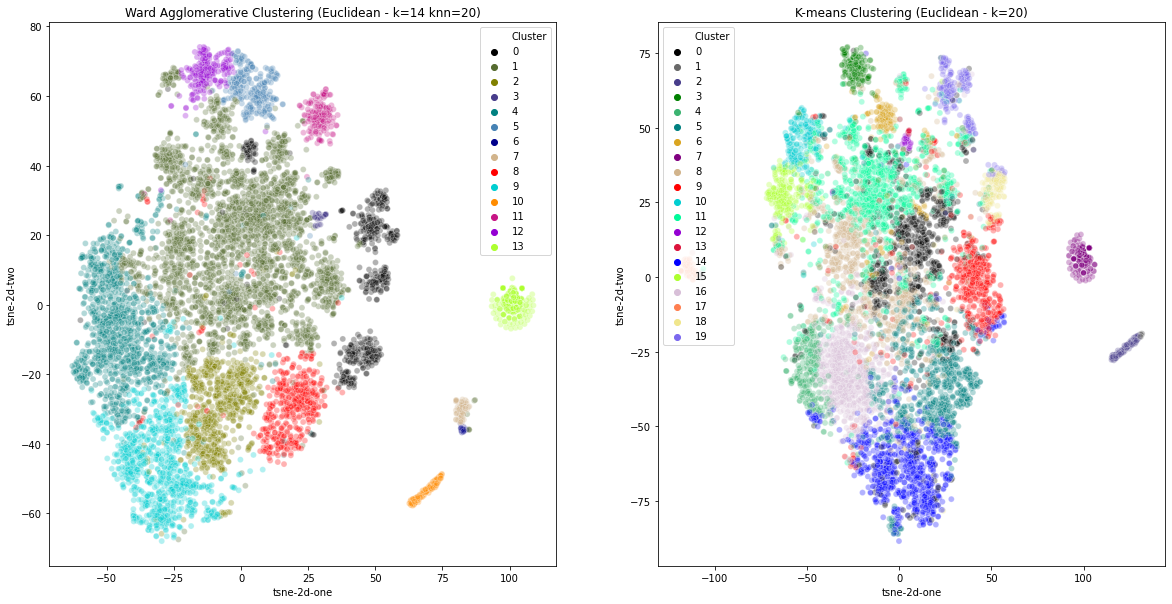

In [108]:
plt.figure(figsize=(20,10))

############################## K-means k=20

X = pd.read_csv('theano-to-tf/272-attentionhcare-271-codes_prediction.csv', header=None)
X, subjects = X.iloc[:,1:], X.iloc[:,:1]
colors = ["#000000", "#696969", "#483d8b", "#008000", "#3cb371", "#008080", "#daa520", "#800080", "#d2b48c", "#ff0000", "#00ced1", "#00fa9a", "#9400d3", "#dc143c", "#0000ff", "#adff2f", "#d8bfd8", "#ff7f50", "#f0e68c", "#7b68ee"]

labels = KMeans(n_clusters=20, random_state=0).fit_predict(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000, random_state=0)
tsne_results = tsne.fit_transform(X)

df = pd.DataFrame({'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1]})
df['Cluster'] = labels.T

ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text('K-means Clustering (Euclidean - k=20)')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)

############################## Linkage k=14 knn=20

X = pd.read_csv('theano-to-tf/272-attentionhcare-271-codes_prediction.csv', header=None)
X = X.iloc[:,1:]
# colors = ["#000000", "#696969", "#483d8b", "#008000", "#3cb371", "#008080", "#daa520", "#800080", "#d2b48c", "#ff0000", "#00ced1", "#9400d3", "#00fa9a", "#dc143c", "#0000ff", "#adff2f", "#d8bfd8", "#ff7f50", "#f0e68c", "#7b68ee", "#ee82ee"]
colors = ["#000000", "#556b2f", "#808000", "#483d8b", "#008080", "#4682b4", "#00008b", "#d2b48c", "#ff0000", "#00ced1", "#ff8c00", "#c71585", "#9400d3", "#adff2f", "#ff00ff"]
# colors = ["#000000", "#696969", "#483d8b", "#008000", "#3cb371", "#008080", "#daa520", "#800080", "#d2b48c", "#ff0000", "#00ced1", "#00fa9a"]

knn_graph = kneighbors_graph(df, 20, include_self=False)
labels = AgglomerativeClustering(n_clusters=14, connectivity=knn_graph).fit_predict(X)
# labels = AgglomerativeClustering(n_clusters=16).fit_predict(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, random_state=0)
tsne_results = tsne.fit_transform(X)

df = pd.DataFrame({'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1]})
df['Cluster'] = labels.T

ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('Ward Agglomerative Clustering (Euclidean - k=14 knn=20)')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)

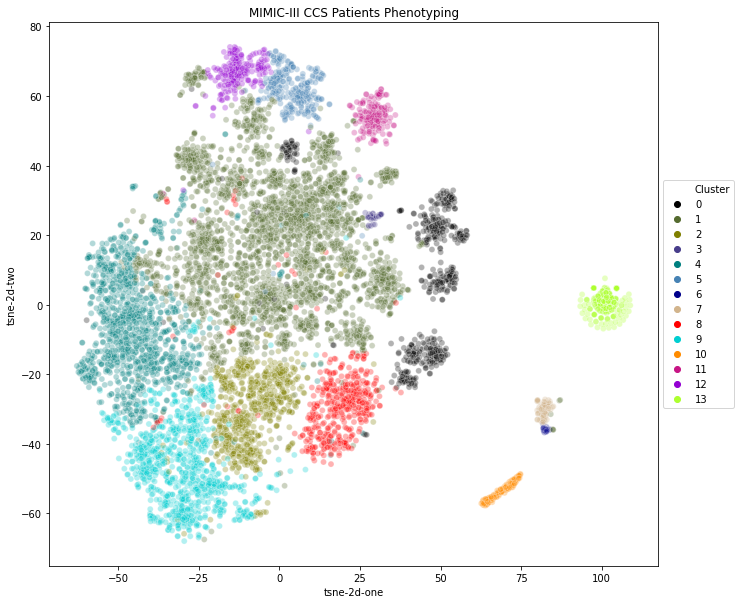

In [109]:
plt.figure(figsize=(24,10))

ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('MIMIC-III CCS Patients Phenotyping')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette(colors, len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)

In [110]:
# ############################## Linkage k=16 knn=20

# df = pd.read_csv('theano-to-tf/272-attentionhcare-542-codes_prediction.csv', header=None)
# df = df.iloc[:,1:]

# knn_graph = kneighbors_graph(df, 20, include_self=False)
# labels = AgglomerativeClustering(n_clusters=16, connectivity=knn_graph).fit_predict(df)

# df['label'] = labels.T

In [111]:
df = X.copy()
df['label'] = labels.T

In [112]:
df.rename(columns=lambda x: list(mapping.keys())[list(mapping.values()).index(int(x)-1)] if x != "label" else "label", inplace=True)

In [113]:
df

,401,427,428,276,250,285,518,414,272,584,...,283,933,358,301,747,746,V18,779,907,label
0,0.004109,0.004989,0.028769,0.012968,0.008394,0.007785,0.050617,0.018794,0.024205,0.022498,...,0.000124,0.000124,0.000124,0.000128,0.000124,0.000124,0.000124,0.000124,0.000124,1
1,0.016219,0.020661,0.032814,0.064551,0.024989,0.029795,0.017165,0.018680,0.018489,0.012512,...,0.000217,0.000217,0.000217,0.000225,0.000217,0.000217,0.000217,0.000217,0.000217,1
2,0.068355,0.067206,0.031333,0.063707,0.023026,0.033221,0.019513,0.021010,0.015112,0.020805,...,0.000092,0.000092,0.000092,0.000094,0.000092,0.000092,0.000092,0.000092,0.000092,9
3,0.007166,0.006288,0.025205,0.009711,0.026280,0.023621,0.009569,0.059926,0.012978,0.010989,...,0.000315,0.000315,0.000315,0.000327,0.000315,0.000315,0.000315,0.000315,0.000315,11
4,0.007350,0.014307,0.036147,0.022450,0.023340,0.018980,0.019395,0.017671,0.020393,0.009504,...,0.000176,0.000176,0.000176,0.000182,0.000176,0.000176,0.000176,0.000176,0.000176,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13


In [114]:
df.rename(columns=lambda x: mapping_names[x] if x != "label" else "label", inplace=True)

In [115]:
df

,Essential hypertension,Cardiac dysrhythmias,Heart failure,Disorders of fluid electrolyte and acid-base balance,Diabetes mellitus,Other and unspecified anemias,Other diseases of lung,Other forms of chronic ischemic heart disease,Disorders of lipoid metabolism,Acute kidney failure,...,Acquired hemolytic anemias,Foreign body in pharynx and larynx,Myoneural disorders,Personality disorders,Other congenital anomalies of circulatory system,Other congenital anomalies of heart,Family history of certain other specific conditions,Other and ill-defined conditions originating in the perinatal period,Late effects of injuries to the nervous system,label
0,0.004109,0.004989,0.028769,0.012968,0.008394,0.007785,0.050617,0.018794,0.024205,0.022498,...,0.000124,0.000124,0.000124,0.000128,0.000124,0.000124,0.000124,0.000124,0.000124,1
1,0.016219,0.020661,0.032814,0.064551,0.024989,0.029795,0.017165,0.018680,0.018489,0.012512,...,0.000217,0.000217,0.000217,0.000225,0.000217,0.000217,0.000217,0.000217,0.000217,1
2,0.068355,0.067206,0.031333,0.063707,0.023026,0.033221,0.019513,0.021010,0.015112,0.020805,...,0.000092,0.000092,0.000092,0.000094,0.000092,0.000092,0.000092,0.000092,0.000092,9
3,0.007166,0.006288,0.025205,0.009711,0.026280,0.023621,0.009569,0.059926,0.012978,0.010989,...,0.000315,0.000315,0.000315,0.000327,0.000315,0.000315,0.000315,0.000315,0.000315,11
4,0.007350,0.014307,0.036147,0.022450,0.023340,0.018980,0.019395,0.017671,0.020393,0.009504,...,0.000176,0.000176,0.000176,0.000182,0.000176,0.000176,0.000176,0.000176,0.000176,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13


In [116]:
df['subject_id'] = subjects
df

,Essential hypertension,Cardiac dysrhythmias,Heart failure,Disorders of fluid electrolyte and acid-base balance,Diabetes mellitus,Other and unspecified anemias,Other diseases of lung,Other forms of chronic ischemic heart disease,Disorders of lipoid metabolism,Acute kidney failure,...,Foreign body in pharynx and larynx,Myoneural disorders,Personality disorders,Other congenital anomalies of circulatory system,Other congenital anomalies of heart,Family history of certain other specific conditions,Other and ill-defined conditions originating in the perinatal period,Late effects of injuries to the nervous system,label,subject_id
0,0.004109,0.004989,0.028769,0.012968,0.008394,0.007785,0.050617,0.018794,0.024205,0.022498,...,0.000124,0.000124,0.000128,0.000124,0.000124,0.000124,0.000124,0.000124,1,28410.0
1,0.016219,0.020661,0.032814,0.064551,0.024989,0.029795,0.017165,0.018680,0.018489,0.012512,...,0.000217,0.000217,0.000225,0.000217,0.000217,0.000217,0.000217,0.000217,1,27901.0
2,0.068355,0.067206,0.031333,0.063707,0.023026,0.033221,0.019513,0.021010,0.015112,0.020805,...,0.000092,0.000092,0.000094,0.000092,0.000092,0.000092,0.000092,0.000092,9,9838.0
3,0.007166,0.006288,0.025205,0.009711,0.026280,0.023621,0.009569,0.059926,0.012978,0.010989,...,0.000315,0.000315,0.000327,0.000315,0.000315,0.000315,0.000315,0.000315,11,28775.0
4,0.007350,0.014307,0.036147,0.022450,0.023340,0.018980,0.019395,0.017671,0.020393,0.009504,...,0.000176,0.000176,0.000182,0.000176,0.000176,0.000176,0.000176,0.000176,8,29570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,20643.0
7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,5060.0
7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,11861.0
7480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,109.0


In [117]:
df.to_csv('272-predictions-with-labels.csv', index=False)

In [118]:
df_sum = df.sum()
df_label_sum = df.groupby('label').sum()
df_label_sum = df_label_sum / df_sum

nlargest = 3
order = np.argsort(-df_label_sum.values, axis=1)[:, :nlargest]
df_top_5 = pd.DataFrame(df_label_sum.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df_label_sum.index)

<ipython-input-118-5356e73bb49d>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_top_5 = pd.DataFrame(df_label_sum.columns[order],


In [119]:
df_label_sum

,Accident to powered aircraft at takeoff or landing,Accidental cut puncture perforation or hemorrhage during medical care,Accidental drowning and submersion,Accidental fall on or from stairs or steps,Accidental poisoning by analgesics antipyretics and antirheumatics,Accidents caused by cutting and piercing instruments or objects,Acquired hemolytic anemias,Acquired hypothyroidism,Acute and subacute endocarditis,Acute and subacute necrosis of liver,...,Symptoms involving urinary system,Thyrotoxicosis with or without goiter,Transient mental disorders due to conditions classified elsewhere,Ulcerative enterocolitis,Unspecified intellectual disabilities,Varicose veins of other sites,Vascular insufficiency of intestine,Viral hepatitis,label,subject_id
label,,,,,,,,,,,,,,,,,,,,,
0,0.060865,0.047865,0.095352,0.049773,0.077481,0.128382,0.076254,0.072492,0.065486,0.076201,...,0.086903,0.076254,0.067270,0.070356,0.076219,0.081545,0.043477,0.019616,NaN,0.083788
1,0.447595,0.361091,0.469369,0.328003,0.461296,0.441728,0.462702,0.414525,0.482859,0.462214,...,0.427777,0.462704,0.288463,0.481021,0.462765,0.478876,0.506338,0.267843,NaN,0.377005
2,0.097845,0.043402,0.084451,0.043706,0.070546,0.055716,0.069898,0.073060,0.058149,0.069669,...,0.074803,0.069896,0.127045,0.057008,0.069736,0.070583,0.075344,0.217921,NaN,0.073642
3,0.003231,0.001416,0.003044,0.001400,0.005870,0.007724,0.005808,0.007441,0.004700,0.005819,...,0.003438,0.005808,0.001345,0.004659,0.005824,0.005475,0.003911,0.000837,NaN,0.006719
4,0.134414,0.086356,0.109279,0.304554,0.100123,0.135493,0.098671,0.110831,0.144715,0.098495,...,0.115143,0.098667,0.141213,0.113173,0.098855,0.097265,0.130670,0.183968,NaN,0.159177
5,0.024638,0.132868,0.043257,0.087980,0.043951,0.048673,0.044100,0.056245,0.034521,0.043972,...,0.057956,0.044100,0.026100,0.042998,0.044169,0.025199,0.024292,0.009142,NaN,0.042329
6,0.001199,0.000699,0.004241,0.000947,0.009909,0.004676,0.010488,0.001400,0.006334,0.010797,...,0.002518,0.010490,0.000860,0.007089,0.010498,0.006677,0.003142,0.000499,NaN,0.001248
7,0.002054,0.001810,0.008803,0.002659,0.019961,0.012172,0.021148,0.008830,0.018689,0.022025,...,0.008985,0.021150,0.001608,0.017155,0.021186,0.029734,0.008322,0.000933,NaN,0.004657
8,0.047420,0.029614,0.038784,0.025584,0.045809,0.031404,0.045633,0.069216,0.041061,0.045543,...,0.039262,0.045632,0.049731,0.051554,0.045550,0.050679,0.029852,0.046554,NaN,0.056460


In [120]:
# df_top_5["top1"] = df.apply(lambda x: list(mapping.keys())[list(mapping.values()).index(x)], axis=1)

# for i in range(len(df_top_5)):
#     df_top_5['top1'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top1'].values[i])].replace("D", "")
#     df_top_5['top2'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top2'].values[i])].replace("D", "")
#     df_top_5['top3'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top3'].values[i])].replace("D", "")
#     df_top_5['top4'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top4'].values[i])].replace("D", "")

#     df_top_5['top5'].values[i] = list(mapping.keys())[list(mapping.values()).index(df_top_5['top5'].values[i])].replace("D", "")

In [121]:
pd.set_option('display.max_colwidth', 3000)

df_top_5

,top1,top2,top3
label,,,
0,Intestinal obstruction without mention of hernia,Antibiotics causing adverse effects in therapeutic use,Emphysema
1,Migraine,Other disorders of biliary tract,Alcohol-induced mental disorders
2,Complications peculiar to certain specified procedures,Chronic pulmonary heart disease,Viral hepatitis
3,Occlusion and stenosis of precerebral arteries,Other hernia of abdominal cavity without mention of obstruction or gangrene,Other symptoms involving abdomen and pelvis
4,Encounter for other and unspecified procedures and aftercare,Persistent mental disorders due to conditions classified elsewhere,Other retinal disorders
5,Complications affecting specified body system not elsewhere classified,Other extrapyramidal disease and abnormal movement disorders,Secondary malignant neoplasm of other specified sites
6,Other and ill-defined cerebrovascular disease,Diseases of pancreas,Fracture of rib(s) sternum larynx and trachea
7,Nephritis and nephropathy not specified as acute or chronic,Diseases of pancreas,Disorders of the autonomic nervous system
8,Hypotension,Drug-induced mental disorders,Other acute and subacute forms of ischemic heart disease


In [122]:
import pickle as pickle

dictionary = pickle.load(open("/Users/pedroferracini/gbdi/ms/clinical-prediction/data/full-datasets/mimic/icd9_to_css_dictionary", 'rb'))